<br/>

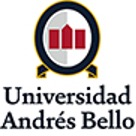

# Guía 1 Estadística y visualización
<span style="color:green"><b>Minería de datos empresariales</b></span>

---



#### Descripción de la base de datos
Datos de 442 pacientes diabéticos con diez variables basales:

- **Pregnancies** Número de veces embarazada
- **Glucose** Concentración plasmática de glucosa a las dos horas en una prueba oral de tolerancia a la glucosa
- **BloodPressure** Presión arterial diastólica (mm Hg)
- **SkinThickness** Grosor del pliegue cutáneo del tríceps (mm)
- **Insulin** Insullina sérica a las dos horas (mu U/ml)
- **BMI** Índice de masa corporal
- **DiabetesPedigreeFunction** Función genealógica de la diabetes
- **Age** Edad en años
- **Outcome** Variable de clase (0 o 1) con o sin diabetes.

## 1. Preprocesamiento

In [15]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# from datetime import datetime, timedelta
# import yfinance as yf

from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler

ModuleNotFoundError: No module named 'scipy'

### Importación de datos

In [ ]:
df = pd.read_csv('diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
110,3,171,72,33,135,33.3,0.199,24,1
689,1,144,82,46,180,46.1,0.335,46,1
398,3,82,70,0,0,21.1,0.389,25,0
242,3,139,54,0,0,25.6,0.402,22,1
726,1,116,78,29,180,36.1,0.496,25,0


### Estadísticos descriptivos

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Discretización variable BMI

In [ ]:
intervals = [0, 18.5, 25, 30, 35, 40, 49, np.infty]
labels = ['Peso insuficiente', 'Peso normal', 'Sobrepeso', 'Obesidad tipo I',
          'Obesidad tipo II', 'Obesidad tipo III', 'Obesidad tipo IV']

df['BMI_class'] = pd.cut(x=df['BMI'], bins=intervals, labels=labels)
df['BMI_class'] = pd.Categorical(df['BMI_class'], categories=labels, ordered=True)

df['BMI_class'].value_counts()

Obesidad tipo I      221
Sobrepeso            180
Obesidad tipo II     148
Peso normal          108
Obesidad tipo III     84
Obesidad tipo IV      12
Peso insuficiente      4
Name: BMI_class, dtype: int64

### Discretización variable Age

In [ ]:
intervals = [20, 30, 40, 60, np.infty]
labels = ['Adulto Joven', 'Adulto Medio', 'Adulto Avanzado', 'Adulto Mayor']

df['Age_class'] = pd.cut(x=df['Age'], bins=intervals, labels=labels)
df['Age_class'] = pd.Categorical(df['Age_class'], categories=labels, ordered=True)

df['Age_class'].value_counts()

Adulto Joven       417
Adulto Avanzado    167
Adulto Medio       157
Adulto Mayor        27
Name: Age_class, dtype: int64

## 2. Visualización

### Gráfico de barras

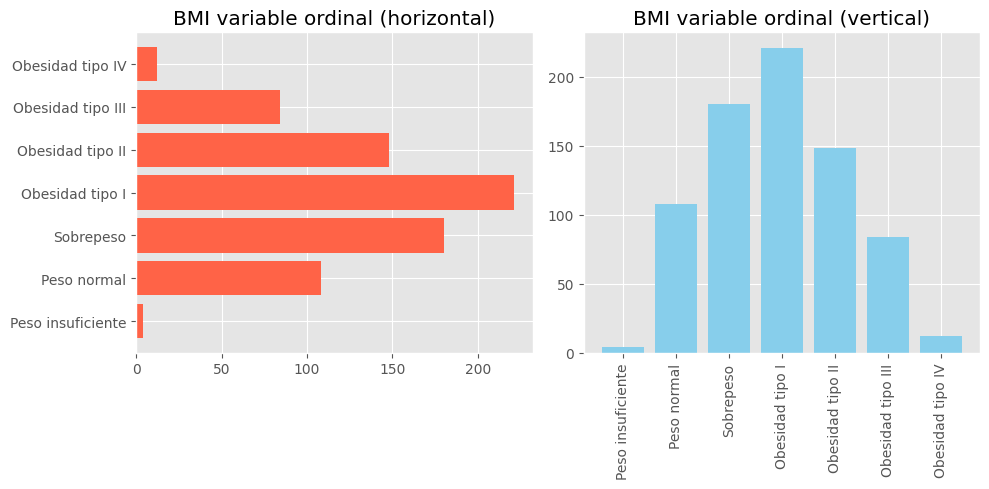

In [ ]:
#print(plt.style.available)

plt.style.use('ggplot')
bmi_counts = df['BMI_class'].value_counts(sort=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].barh(y=bmi_counts.index, width=bmi_counts, color='tomato')
ax[0].set_title('BMI variable ordinal (horizontal)')

ax[1].bar(x=bmi_counts.index, height=bmi_counts, color='skyblue')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('BMI variable ordinal (vertical)')

plt.tight_layout()
plt.show()

### Gráfico de Pie

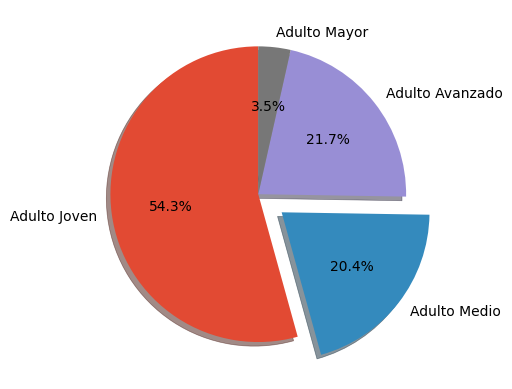

In [ ]:
plt.style.use('ggplot')
age_counts = df['Age_class'].value_counts(sort=False)

explode = (0, 0.2, 0, 0) # explode para 2nd slice Adulto Medio
plt.pie(age_counts, explode=explode, labels=age_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show();

### Histograma

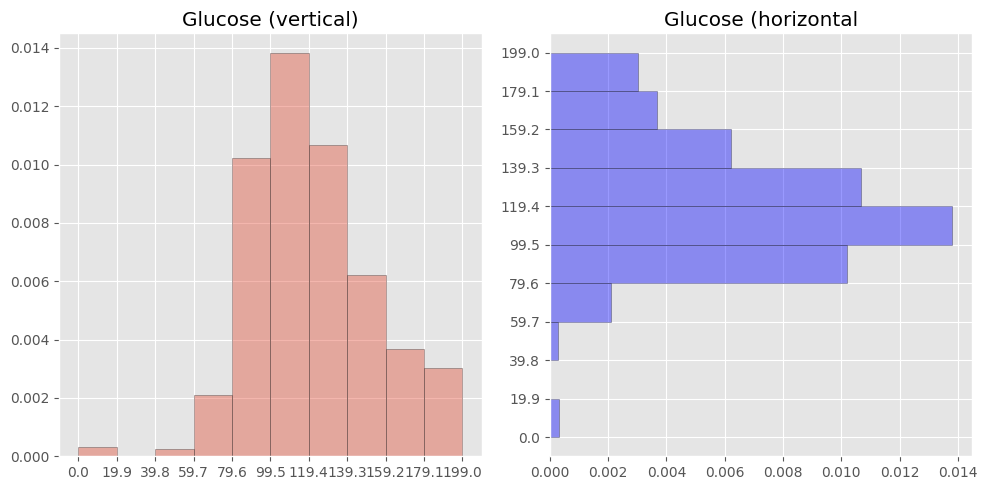

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

n, bins, _ = ax[0].hist(x=df['Glucose'], density=True, edgecolor='black', alpha=.4)
ax[0].set_title('Glucose (vertical)')
ax[0].set_xticks(bins)

n, bins, _ = ax[1].hist(x=df['Glucose'], density=True, color='blue', edgecolor='black', alpha=.4, orientation='horizontal')
ax[1].set_title('Glucose (horizontal')
ax[1].set_yticks(bins)

plt.tight_layout()
plt.show();

### Gráfico de líneas

In [ ]:
# Se cargan datos de tres acciones Chilenas Banco Chile, Banco Santander y ITAU
symbol = ['FALABELLA.SN', 'CENCOSUD.SN', 'RIPLEY.SN']

data_aux = pd.DataFrame()
for symb in symbol:
    data = yf.download(symb, start='2023-01-01', end='2024-01-01').loc[:,'Close']
    data.name = symb
    data = pd.DataFrame(data)

    if data_aux.shape[0] == 0:
        data_aux = data.copy()
    else:
        data_aux = pd.merge(left=data_aux, right=data, how='inner', on='Date')

data_aux.sample(8)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,FALABELLA.SN,CENCOSUD.SN,RIPLEY.SN
Date,,,
2023-04-10,1795.000000,1562.0,161.899994
2023-01-27,1855.000000,1475.0,163.789993
2023-07-27,2190.000000,1820.0,174.820007
2023-12-26,2204.500000,1665.0,170.389999
2023-05-10,1740.000000,1538.0,167.949997
2023-02-16,1908.800049,1504.0,178.220001
2023-10-04,1915.000000,1640.0,164.559998
2023-11-07,1952.800049,1515.0,154.389999


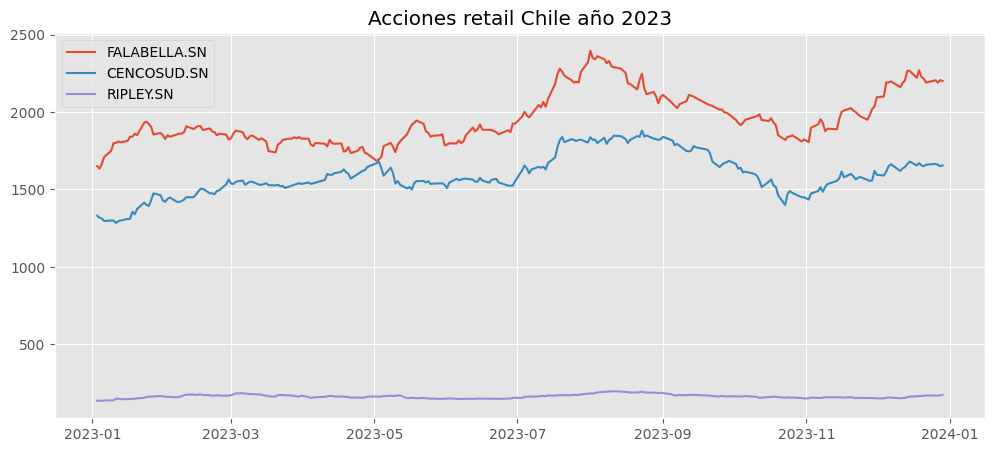

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data_aux.index, data_aux['FALABELLA.SN'], label='FALABELLA.SN')
plt.plot(data_aux.index, data_aux['CENCOSUD.SN'], label='CENCOSUD.SN')
plt.plot(data_aux.index, data_aux['RIPLEY.SN'], label='RIPLEY.SN')

plt.title('Acciones retail Chile año 2023')
plt.legend();

### Gráfico de caja y bigotes

In [9]:
age_class = df['age_class'].sort_values().unique()
box_colors = ['lightblue', 'tomato', 'lightyellow', 'lightgreen']


fig, ax = plt.subplots(nrows=1, ncols=3 figsize=(13, 5))

bplot1 = ax[0].boxplot([df[df['Age_class']==ss]['Insulin'] for ss in age_class], patch_artist=True)
ax[0].set_title('Insulin (vertical)')
ax[0].set_xticklabels(age_class)


bplot2 = ax[1].boxplot(vert=False, x=[df[df['Age_class']==ss]['Insulin'] for ss in age_class], patch_artist=True)
ax[1].set_title('Insulin (horizontal)')
ax[1].set_yticklabels(age_class)


for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], box_colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.show();

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2430819851.py, line 5)

### Gráfico de dispersión

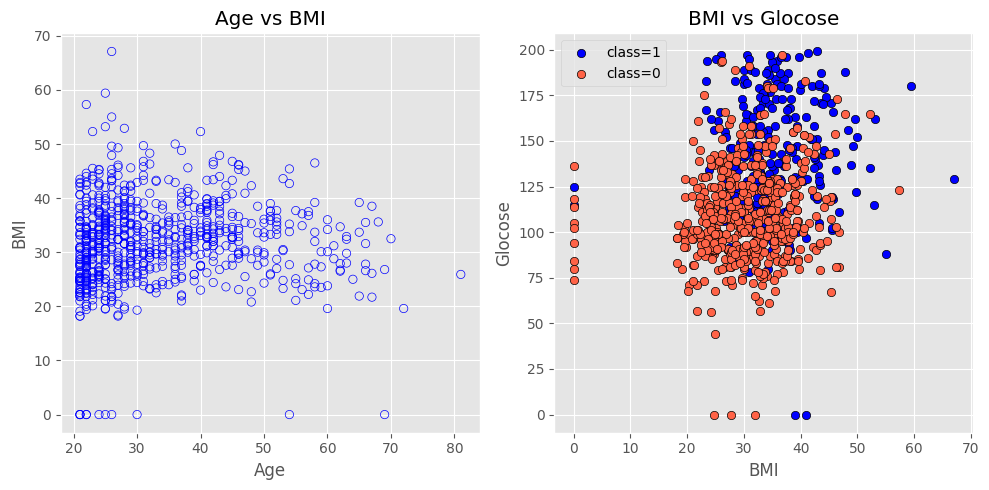

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(x=df['Age'], y=df['BMI'], edgecolors='blue', facecolors='none')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('BMI')
ax[0].set_title('Age vs BMI')

colors = ['blue', 'tomato']
for i, out in enumerate(df['Outcome'].unique()):
    df_tmp = df[df['Outcome']==out]
    ax[1].scatter(x=df_tmp['BMI'], y=df_tmp['Glucose'], edgecolors='black', facecolors=colors[i], label=f'class={out}')

ax[1].set_title('BMI vs Glocose')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Glocose')
ax[1].legend()

plt.tight_layout()
plt.show();

## 3. Medidas de tendencia central

### Media
$$
\large{
\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_{i}
}
$$

In [ ]:
n = 5
desde = 1.0
hasta = 7.0
notas = desde + (hasta-desde) * np.round(np.random.rand(n), 1)

print('_'*10)
print(f'\nnotas: {notas}\n')

promedio = np.mean(notas)
print(f'Promedio: {np.round(promedio, 2)}')
print('_'*10)

__________

notas: [5.8 5.2 1.  2.2 1.6]

Promedio: 3.16
__________


### Mediana
$$
\large{M_{e}=X_{(n+1)/2}}\\
$$

$$
\large{
M_{e}=\frac{(X_{n/2} + X_{n/2 + 1})}{2}
}
$$

In [ ]:
n = 10
desde = 1.0
hasta = 7.0
notas = np.round(desde + (hasta-desde) * np.round(np.random.rand(n), 1), 1)
notas = sorted(notas)

print('_'*10)
print(f'\nnotas: {notas}\n')

mediana = np.median(notas)
print(f'Mediana: {np.round(mediana, 2)}')
print('_'*10)

__________

notas: [2.2, 2.8, 3.4, 3.4, 3.4, 5.2, 5.2, 5.8, 6.4, 6.4]

Mediana: 4.3
__________


### Moda
Valor más frecuente

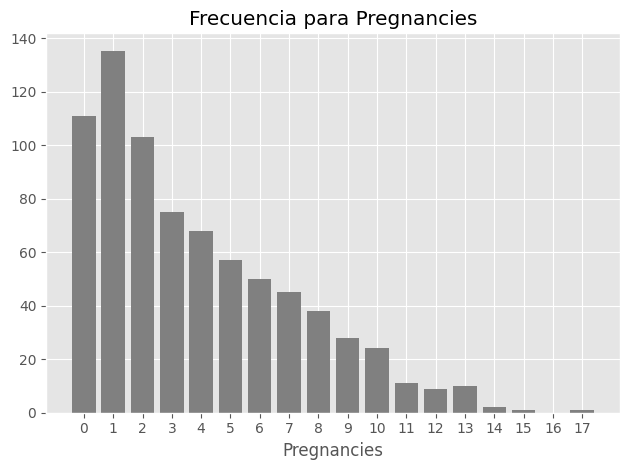

In [ ]:
#print(plt.style.available)

plt.style.use('ggplot')
preg_counts = df['Pregnancies'].value_counts(sort=False)
plt.bar(x=preg_counts.index, height=preg_counts, color='grey')

preg_min = int(np.min(preg_counts.index))
preg_max = int(np.max(preg_counts.index))
plt.xticks(np.linspace(preg_min, preg_max, preg_max+1))

plt.title('Frecuencia para Pregnancies')
plt.xlabel('Pregnancies')

plt.tight_layout()
plt.show()

In [ ]:
preg_moda = df['Pregnancies'].mode().values
print('_'*10)
print(f'\nLa moda es: {preg_moda[0]}')
print('_'*10)

__________

La moda es: 1
__________


## 4. Medidas de variación

### Varianza

$$
\large{\sigma^2=\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^2}\\
$$

$$
\large{
S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2
}
$$

In [ ]:
varp = np.var(df['BMI'], ddof=0)
vars = np.var(df['BMI'], ddof=1)
print('_'*10)
print('Variable BMI:')
print(f'Varianza poblacional: {varp}')
print(f'Varianza muestral: {vars}')
print('_'*10)

__________
Variable BMI:
Varianza poblacional: 62.079046478271486
Varianza muestral: 62.15998395738266
__________


### Desviación estándar

$$
\large{
\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^2}}\\
$$

$$
\large{
S=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2}
}
$$

In [ ]:
stdp = np.std(df['BMI'], ddof=0)
stds = np.std(df['BMI'], ddof=1)
print('_'*10)
print('Variable BMI:')
print(f'Desv. estándar poblacional: {stdp}')
print(f'Desv. estándar: {stds}')
print('_'*10)

__________
Variable BMI:
Desv. estándar poblacional: 7.87902573154013
Desv. estándar: 7.884160320375446
__________


### Coeficiente de variación

$$
\large{
CV = 100\% \times \frac{S}{\bar{X}}
}
$$

In [ ]:
cv_bmi = 100*np.std(df['BMI'], ddof=1)/np.mean(df['BMI'])
cv_glu = 100*np.std(df['Glucose'], ddof=1)/np.mean(df['Glucose'])

print('_'*10)
print(f'CV para BMI: {cv_bmi}')
print(f'CV para Glucose: {cv_glu}')
print('_'*10)

__________
CV para BMI: 24.64371670695247
CV para Glucose: 26.446703473310517
__________


### Rango y rango intercuartilico

$$
\large{
\text{Rango} = \max{(X)}-\min{(X)}
}
$$

$$
\large{
\text{IQR} = Q_3-Q_1
}
$$

In [ ]:
rango = np.max(df['BMI'])-np.min(df['BMI'])
iqr = np.quantile(df['BMI'], .75) - np.quantile(df['BMI'], .25)

print('_'*10)
print('Variable BMI:')
print(f'Rango: {rango}')
print(f'IQR: {iqr}')
print('_'*10)

__________
Variable BMI:
Rango: 67.1
IQR: 9.3
__________


## 5. Otras medidas de posición cuantiles
- Cuartiles
- Quintiles
- Deciles
- Percentiles

In [ ]:
def plot_quantile(quantils, serie, ax, fontsize=8, qshow=True):
    # Calcula los cuantiles
    q_lst = [np.round(np.quantile(serie, q), 1) for q in quantils]

    # Graficar el diagrama de caja
    ax.boxplot(serie, vert=False, widths=0.2, patch_artist=True, medianprops={'color': 'black'})
    ax.scatter(q_lst, [1]*len(q_lst), color='tomato', zorder=5, edgecolors=['black']*len(q_lst))  # Marcadores para los cuantiles

    if qshow:
        for i, q in enumerate(q_lst):
            ax.text(q, 1.2, f'Q{i+1}\n{q}', fontsize=fontsize, ha='center')

    ax.set_yticks([])

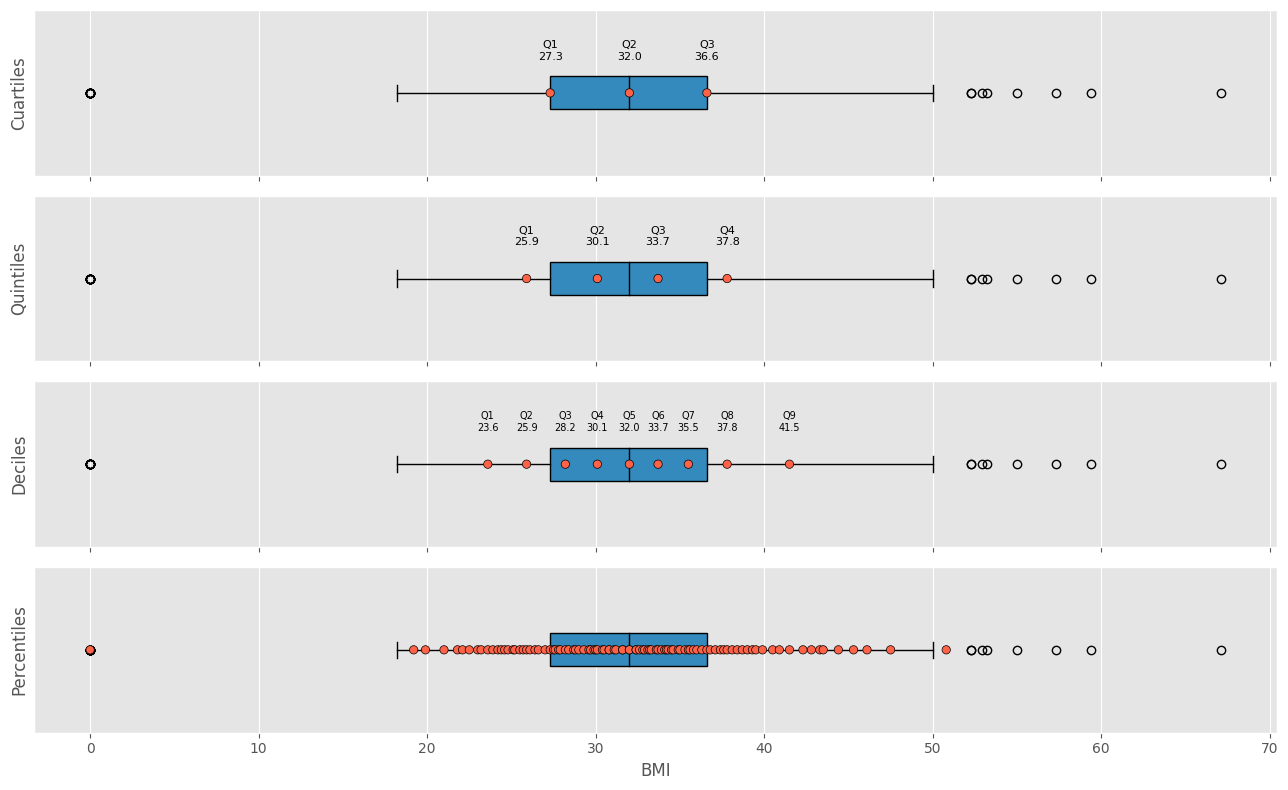

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(13, 8))

cuantiles = {
    'cuartiles': np.linspace(.25, .75, 3),
    'quintiles': np.linspace(.2, .8, 4),
    'deciles': np.linspace(.1, .9, 9),
    'percentiles': np.linspace(.01, .99, 99)
}

for i, (tipo, quantils) in enumerate(cuantiles.items()):
    if tipo == 'deciles':
        fontsize = 7
    elif tipo == 'percentiles':
        qshow = False
    else:
        fontsize = 8
        qshow = True

    ax[i].set_ylabel(tipo.capitalize())
    plot_quantile(quantils, df['BMI'], ax[i], fontsize=fontsize, qshow=qshow)

plt.xlabel('BMI')
plt.tight_layout()
plt.show();


## 6. Distribución Normal

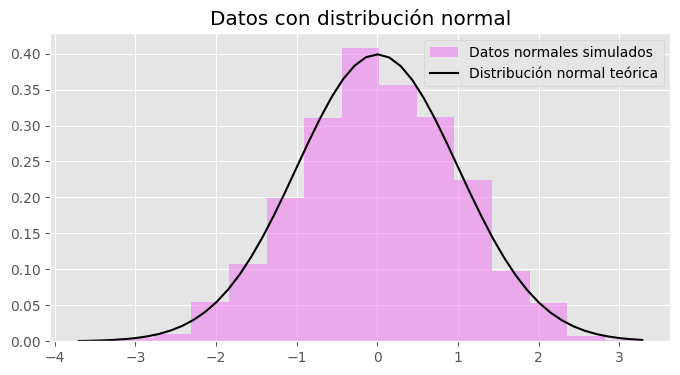

In [ ]:
n = 1500
media = 0.0
std = 1.0
X = np.random.normal(loc=media, scale=std, size=n)

x_min = np.min(X)
x_max = np.max(X)

X_teo = np.linspace(x_min, x_max, 50)

plt.figure(figsize=(8, 4))
plt.hist(X, density=True, bins=15, color='violet', alpha=.6, label='Datos normales simulados')
plt.plot(X_teo, sc.stats.norm.pdf(X_teo, loc=media, scale=std), color='black', label='Distribución normal teórica')
plt.title('Datos con distribución normal')

plt.legend();

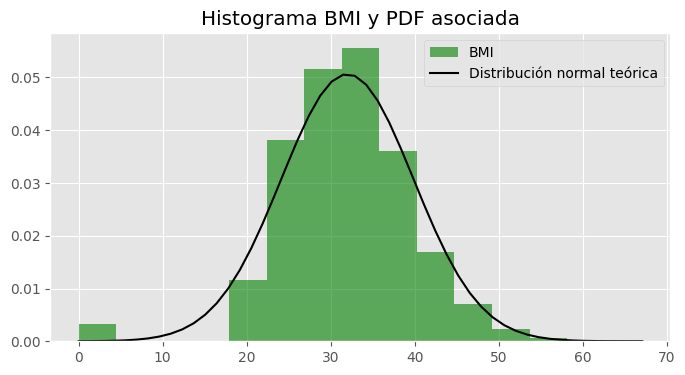

In [ ]:
X = df['BMI']
media = np.mean(X)
std = np.std(X)

x_min = np.min(X)
x_max = np.max(X)

X_teo = np.linspace(x_min, x_max, 50)

plt.figure(figsize=(8, 4))
plt.hist(X, density=True, bins=15, color='green', alpha=.6, label='BMI')
plt.plot(X_teo, sc.stats.norm.pdf(X_teo, loc=media, scale=std), color='black', label='Distribución normal teórica')
plt.title('Histograma BMI y PDF asociada')

plt.legend();

## 7. Transformación de variables

In [ ]:
df2 = pd.read_csv('db1.csv')
df2

,RUT,NOMBRE,EDAD,PESO,ALTURA,ESTADO_CIVIL
0,11.111.111-1,Juan,23,90.30,1.80,Casado
1,7.222.222-2,María,34,70.61,1.60,Soltero
2,8.333.333-3,Veronica,42,69.20,1.57,Casado
3,9.444.444-4,Carolina,43,65.70,1.52,Divorciado
4,10.555.555-5,Marcos,21,89.20,1.65,Casado
5,11.666.666-6,Pedro,26,75.50,1.68,Divorciado
6,12.777.777-7,Luis,28,78.10,1.72,Casado
7,13.888.888-8,Patricio,35,85.00,1.85,Divorciado
8,14.999.999-9,Carla,38,67.44,1.70,Soltero
9,15.111.111-1,Ximena,42,70.60,1.63,Soltero


### Transformación One hot encoder

In [ ]:
# Importar los datos
df2 = pd.read_csv('db1.csv')

# Columna con datos categoricos en formato np.array
array_ecivil = np.array(df2['ESTADO_CIVIL']).reshape(-1, 1)

# Transformación con codificación One Hot Encoder
ohe = OneHotEncoder(sparse_output=False, dtype='int')
result = ohe.fit_transform(array_ecivil, )

# Se agregan la nueva codificación al DataFrame inicial
df_result = pd.DataFrame(result, columns=ohe.categories_[0])
df3 = pd.concat([df2, df_result], axis=1)
df3

,RUT,NOMBRE,EDAD,PESO,ALTURA,ESTADO_CIVIL,Casado,Divorciado,Soltero
0,11.111.111-1,Juan,23,90.30,1.80,Casado,1,0,0
1,7.222.222-2,María,34,70.61,1.60,Soltero,0,0,1
2,8.333.333-3,Veronica,42,69.20,1.57,Casado,1,0,0
3,9.444.444-4,Carolina,43,65.70,1.52,Divorciado,0,1,0
4,10.555.555-5,Marcos,21,89.20,1.65,Casado,1,0,0
5,11.666.666-6,Pedro,26,75.50,1.68,Divorciado,0,1,0
6,12.777.777-7,Luis,28,78.10,1.72,Casado,1,0,0
7,13.888.888-8,Patricio,35,85.00,1.85,Divorciado,0,1,0
8,14.999.999-9,Carla,38,67.44,1.70,Soltero,0,0,1
9,15.111.111-1,Ximena,42,70.60,1.63,Soltero,0,0,1


### Transformación dummies (Pandas)

In [ ]:
# Usando dummies desde pandas
df3 = pd.get_dummies(data=df2, columns=['ESTADO_CIVIL'],
                     prefix='', prefix_sep='', dtype='int')
df3

,RUT,NOMBRE,EDAD,PESO,ALTURA,Casado,Divorciado,Soltero
0,11.111.111-1,Juan,23,90.30,1.80,1,0,0
1,7.222.222-2,María,34,70.61,1.60,0,0,1
2,8.333.333-3,Veronica,42,69.20,1.57,1,0,0
3,9.444.444-4,Carolina,43,65.70,1.52,0,1,0
4,10.555.555-5,Marcos,21,89.20,1.65,1,0,0
5,11.666.666-6,Pedro,26,75.50,1.68,0,1,0
6,12.777.777-7,Luis,28,78.10,1.72,1,0,0
7,13.888.888-8,Patricio,35,85.00,1.85,0,1,0
8,14.999.999-9,Carla,38,67.44,1.70,0,0,1
9,15.111.111-1,Ximena,42,70.60,1.63,0,0,1


### Escalamiento, Normalización y Estadandarización

#### Min-Max

In [ ]:
# Escalamiento Min-Max
from sklearn.preprocessing import MinMaxScaler

X_new = MinMaxScaler().fit_transform(np.array(df2['EDAD']).reshape(-1, 1))
df3 = pd.concat([df2, pd.DataFrame(X_new, columns=['Edad_mmax'])], axis=1)
df3

,RUT,NOMBRE,EDAD,PESO,ALTURA,ESTADO_CIVIL,Edad_mmax
0,11.111.111-1,Juan,23,90.30,1.80,Casado,0.086957
1,7.222.222-2,María,34,70.61,1.60,Soltero,0.565217
2,8.333.333-3,Veronica,42,69.20,1.57,Casado,0.913043
3,9.444.444-4,Carolina,43,65.70,1.52,Divorciado,0.956522
4,10.555.555-5,Marcos,21,89.20,1.65,Casado,0.000000
5,11.666.666-6,Pedro,26,75.50,1.68,Divorciado,0.217391
6,12.777.777-7,Luis,28,78.10,1.72,Casado,0.304348
7,13.888.888-8,Patricio,35,85.00,1.85,Divorciado,0.608696
8,14.999.999-9,Carla,38,67.44,1.70,Soltero,0.739130
9,15.111.111-1,Ximena,42,70.60,1.63,Soltero,0.913043


#### Normalización

In [ ]:
# Normalización
np.array(df2['EDAD'])
X_new = Normalizer().fit_transform(np.array(df2['EDAD']).reshape(1, -1)).T
df3 = pd.concat([df3, pd.DataFrame(X_new, columns=['Edad_norm'])], axis=1)
df3

,RUT,NOMBRE,EDAD,PESO,ALTURA,ESTADO_CIVIL,Edad_mmax,Edad_norm
0,11.111.111-1,Juan,23,90.30,1.80,Casado,0.086957,0.189456
1,7.222.222-2,María,34,70.61,1.60,Soltero,0.565217,0.280066
2,8.333.333-3,Veronica,42,69.20,1.57,Casado,0.913043,0.345963
3,9.444.444-4,Carolina,43,65.70,1.52,Divorciado,0.956522,0.354201
4,10.555.555-5,Marcos,21,89.20,1.65,Casado,0.000000,0.172982
5,11.666.666-6,Pedro,26,75.50,1.68,Divorciado,0.217391,0.214168
6,12.777.777-7,Luis,28,78.10,1.72,Casado,0.304348,0.230642
7,13.888.888-8,Patricio,35,85.00,1.85,Divorciado,0.608696,0.288303
8,14.999.999-9,Carla,38,67.44,1.70,Soltero,0.739130,0.313014
9,15.111.111-1,Ximena,42,70.60,1.63,Soltero,0.913043,0.345963


#### Estandarización

In [ ]:
# Estandarización
X_new = StandardScaler().fit_transform(np.array(df2['EDAD']).reshape(-1, 1))
df3 = pd.concat([df3, pd.DataFrame(X_new, columns=['Edad_std'])], axis=1)
df3

,RUT,NOMBRE,EDAD,PESO,ALTURA,ESTADO_CIVIL,Edad_mmax,Edad_norm,Edad_std
0,11.111.111-1,Juan,23,90.30,1.80,Casado,0.086957,0.189456,-1.149842
1,7.222.222-2,María,34,70.61,1.60,Soltero,0.565217,0.280066,0.165577
2,8.333.333-3,Veronica,42,69.20,1.57,Casado,0.913043,0.345963,1.122245
3,9.444.444-4,Carolina,43,65.70,1.52,Divorciado,0.956522,0.354201,1.241829
4,10.555.555-5,Marcos,21,89.20,1.65,Casado,0.000000,0.172982,-1.389009
5,11.666.666-6,Pedro,26,75.50,1.68,Divorciado,0.217391,0.214168,-0.791091
6,12.777.777-7,Luis,28,78.10,1.72,Casado,0.304348,0.230642,-0.551924
7,13.888.888-8,Patricio,35,85.00,1.85,Divorciado,0.608696,0.288303,0.285161
8,14.999.999-9,Carla,38,67.44,1.70,Soltero,0.739130,0.313014,0.643911
9,15.111.111-1,Ximena,42,70.60,1.63,Soltero,0.913043,0.345963,1.122245


---